In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import simpleaudio as sa


# Create and visualize graph.

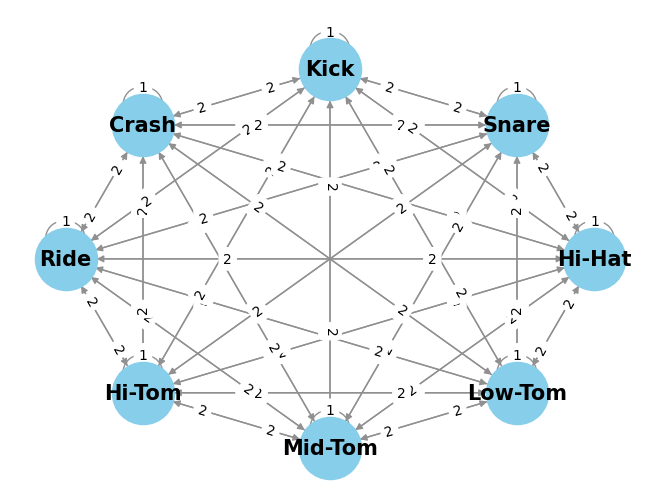

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
nodes = ["Hi-Hat", "Snare", "Kick", "Crash", "Ride", "Hi-Tom", "Mid-Tom", "Low-Tom"]
G.add_nodes_from(nodes)

# Add edges with specified weights
for node1 in nodes:
    for node2 in nodes:
        if node1 == node2:
            weight = 1  # Weight for self-loops
        else:
            weight = 2  # Weight for all other edges
        G.add_edge(node1, node2, weight=weight)

# Draw the graph
pos = nx.circular_layout(G)  # positions for all nodes in a circular layout
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='#909090', node_size=2000, font_size=15, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges}, label_pos=0.3)
plt.show()

# Initialize agents and simulate movement.

In [18]:
# Initialize positions of four limbs on random nodes
limbs = {f'Limb_{i}': random.choice(nodes) for i in range(1, 5)}

In [19]:
def move_limb(limb, current_node, G):
    edges = list(G.out_edges(current_node, data=True))
    next_node = random.choices([edge[1] for edge in edges], weights=[edge[2]['weight'] for edge in edges])[0]
    limbs[limb] = next_node

def update_limbs(G, limbs):
    for limb in limbs:
        move_limb(limb, limbs[limb], G)

# Convert audio.

In [ ]:
from pydub import AudioSegment

def convert_audio(file_path):
    sound = AudioSegment.from_file(file_path, format="wav")
    sound = sound.set_sample_width(2)  # Set to 2 bytes = 16 bits
    sound.export(file_path, format="wav")

# Convert your WAV file to 16-bit PCM
convert_audio("path/to/your/original.wav")

# Play sounds.

In [20]:
sound_files = {
    "Hi-Hat": "samples/Hi-Hat.wav",
    "Snare": "samples/Snare.wav",
    "Kick": "samples/Kick.wav",
    "Crash": "samples/Crash.wav",
    "Ride": "samples/Ride.wav",
    "Hi-Tom": "samples/Hi-Tom.wav",
    "Mid-Tom": "samples/Mid-Tom.wav",
    "Low-Tom": "samples/Low-Tom.wav"
}

def play_sound(node):
    wave_obj = sa.WaveObject.from_wave_file(sound_files[node])
    wave_obj.play()

# Example of playing sound during limb update
def update_limbs_with_sound(G, limbs):
    for limb in limbs:
        current_node = limbs[limb]
        move_limb(limb, current_node, G)
        play_sound(limbs[limb])

# Manage Timing

In [21]:
import time

bpm = 120  # Beats per minute
interval = 60 / bpm  # Interval in seconds

while True:
    update_limbs_with_sound(G, limbs)
    time.sleep(interval)

Error: unknown format: 3